This tutorial demonstrates runing Molecular Dynamics (MD) simulations on lattice systems.
First, import all the stuff we'll need

In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
from libra_py import units
from libra_py import QE_methods
from libra_py import normal_modes

import py3Dmol   # molecular visualization
import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::v

In [6]:
dt = 1.0*units.fs2au
PT = {"P":31.0 }
#R, V, M, E = QE_methods.read_md_data_xyz("pristine-pos-1.xyz", PT, dt)
# Here, we read in all data as Angstroms and convert them to Bohrs by 
# multiplying the raw data by `units.Angst` under the hood. Of course, we need to 
# convert them to the correct units.
# By default, velocities and forces printed out by CP2k are already in a.u., but
# we have the extra units.Angst factor

R, E = QE_methods.read_md_data_xyz2("pristine-pos-1.xyz", PT)  # already in Bohrs
V, E = QE_methods.read_md_data_xyz2("pristine-vel-1.xyz", PT)  # 
F, E = QE_methods.read_md_data_xyz2("pristine-frc-1.xyz", PT)

V = V / units.Angst
F = F / units.Angst

M = MATRIX(V.num_of_rows, 1)
for i in range(V.num_of_rows):
    M.set(i,0, PT["P"])
    
print( V.num_of_rows, V.num_of_cols)

A = F / PT["P"]

192 10001


In [7]:

params = {"cov_flag":0, "visualize":0, "verbosity":1 }
res00 = normal_modes.compute_cov( R, V, A, M, E, params)         # Strachan, with acc
res01 = normal_modes.compute_cov1( R, V, M, E, params)           # Strachan, no acc
res02 = normal_modes.compute_cov2( R, A, M, E, 300.0, params)    # Pereverzev

params = {"cov_flag":1, "visualize":0, "verbosity":1 }
res10 = normal_modes.compute_cov( R, V, A, M, E, params)         # Strachan, with acc
res11 = normal_modes.compute_cov1( R, V, M, E, params)           # Strachan, no acc
res12 = normal_modes.compute_cov2( R, A, M, E, 300.0, params)    # Pereverzev


========= Normal modes calculations according to: =============================
Strachan, A. Normal Modes and Frequencies from Covariances in Molecular Dynamics        or Monte Carlo Simulation. J. Chem. Phys. 2003, 120, 1-4.

Computing covariance matrix of positions

Computing covariance matrix of velocities

Computing covariance matrix of accelerations

Eigenvalue solver for covariance matrix of positions

Eigenvalue solver for covariance matrix of velocities

Eigenvalue solver for covariance matrix of accelerations

Angular frequencies (derived from w_v/w_r)
Angular frequencies (derived from w_a/w_r)
========= Done with the Normal modes calculations =============================
========= Normal modes calculations according to: =============================
Strachan, A. Normal Modes and Frequencies from Covariances in Molecular Dynamics        or Monte Carlo Simulation. J. Chem. Phys. 2003, 120, 1-4.

Computing covariance matrix of positions

Computing covariance matrix of velocitie

In [8]:
ndof = R.num_of_rows
dat00, dat01, dat02 = [], [], []
dat10, dat11, dat12 = [], [], []
for i in range(ndof):
    w00 = res00[1].get(i)
    w01 = res01[1].get(i)
    w02 = res02[1].get(i)
    w10 = res10[1].get(i)
    w11 = res11[1].get(i)
    w12 = res12[1].get(i)
    
    dat00.append(w00)    
    dat01.append(w01)    
    dat02.append(w02)    
    dat10.append(w10)    
    dat11.append(w11)    
    dat12.append(w12)    
    
    print( F"Mode {i}\t{w00 : 5.0f}\t{w01 : 5.0f}\t{w02 : 5.0f}\t{w10 : 5.0f}\t{w11 : 5.0f}\t{w12 : 5.0f}"  )

Mode 0	    9	    9	    0	    0	    0	    0
Mode 1	    0	    0	    0	  682	  682	    0
Mode 2	    0	    0	    0	    0	    0	    0
Mode 3	  290	  290	  104	  321	  321	  104
Mode 4	  305	  305	  114	  316	  316	  114
Mode 5	  305	  305	  118	  322	  322	  118
Mode 6	  326	  326	  121	  331	  331	  121
Mode 7	  321	  321	  137	  328	  328	  137
Mode 8	  310	  310	  147	  324	  324	  147
Mode 9	  306	  306	  150	  317	  317	  150
Mode 10	  316	  316	  158	  322	  322	  158
Mode 11	  311	  311	  160	  322	  322	  160
Mode 12	  313	  313	  163	  322	  322	  163
Mode 13	  317	  317	  177	  320	  320	  177
Mode 14	  316	  316	  192	  323	  323	  192
Mode 15	  315	  315	  203	  324	  324	  203
Mode 16	  322	  322	  216	  322	  322	  216
Mode 17	  319	  319	  225	  328	  328	  225
Mode 18	  320	  320	  227	  329	  329	  227
Mode 19	  313	  313	  233	  321	  321	  233
Mode 20	  310	  310	  245	  319	  319	  245
Mode 21	  306	  306	  256	  315	  315	  256
Mode 22	  308	  308	  258	  314	  314	  25

In [13]:
w = []
for i in range(600):
    w.append(1.0*i)

z00 = DATA(dat00)
z01 = DATA(dat01)
z02 = DATA(dat02)
z10 = DATA(dat10)
z11 = DATA(dat11)
z12 = DATA(dat12)
dens00, cum00 = z00.Calculate_Distribution(w)
dens01, cum01 = z01.Calculate_Distribution(w)
dens02, cum02 = z02.Calculate_Distribution(w)
dens10, cum10 = z10.Calculate_Distribution(w)
dens11, cum11 = z11.Calculate_Distribution(w)
dens12, cum12 = z12.Calculate_Distribution(w)

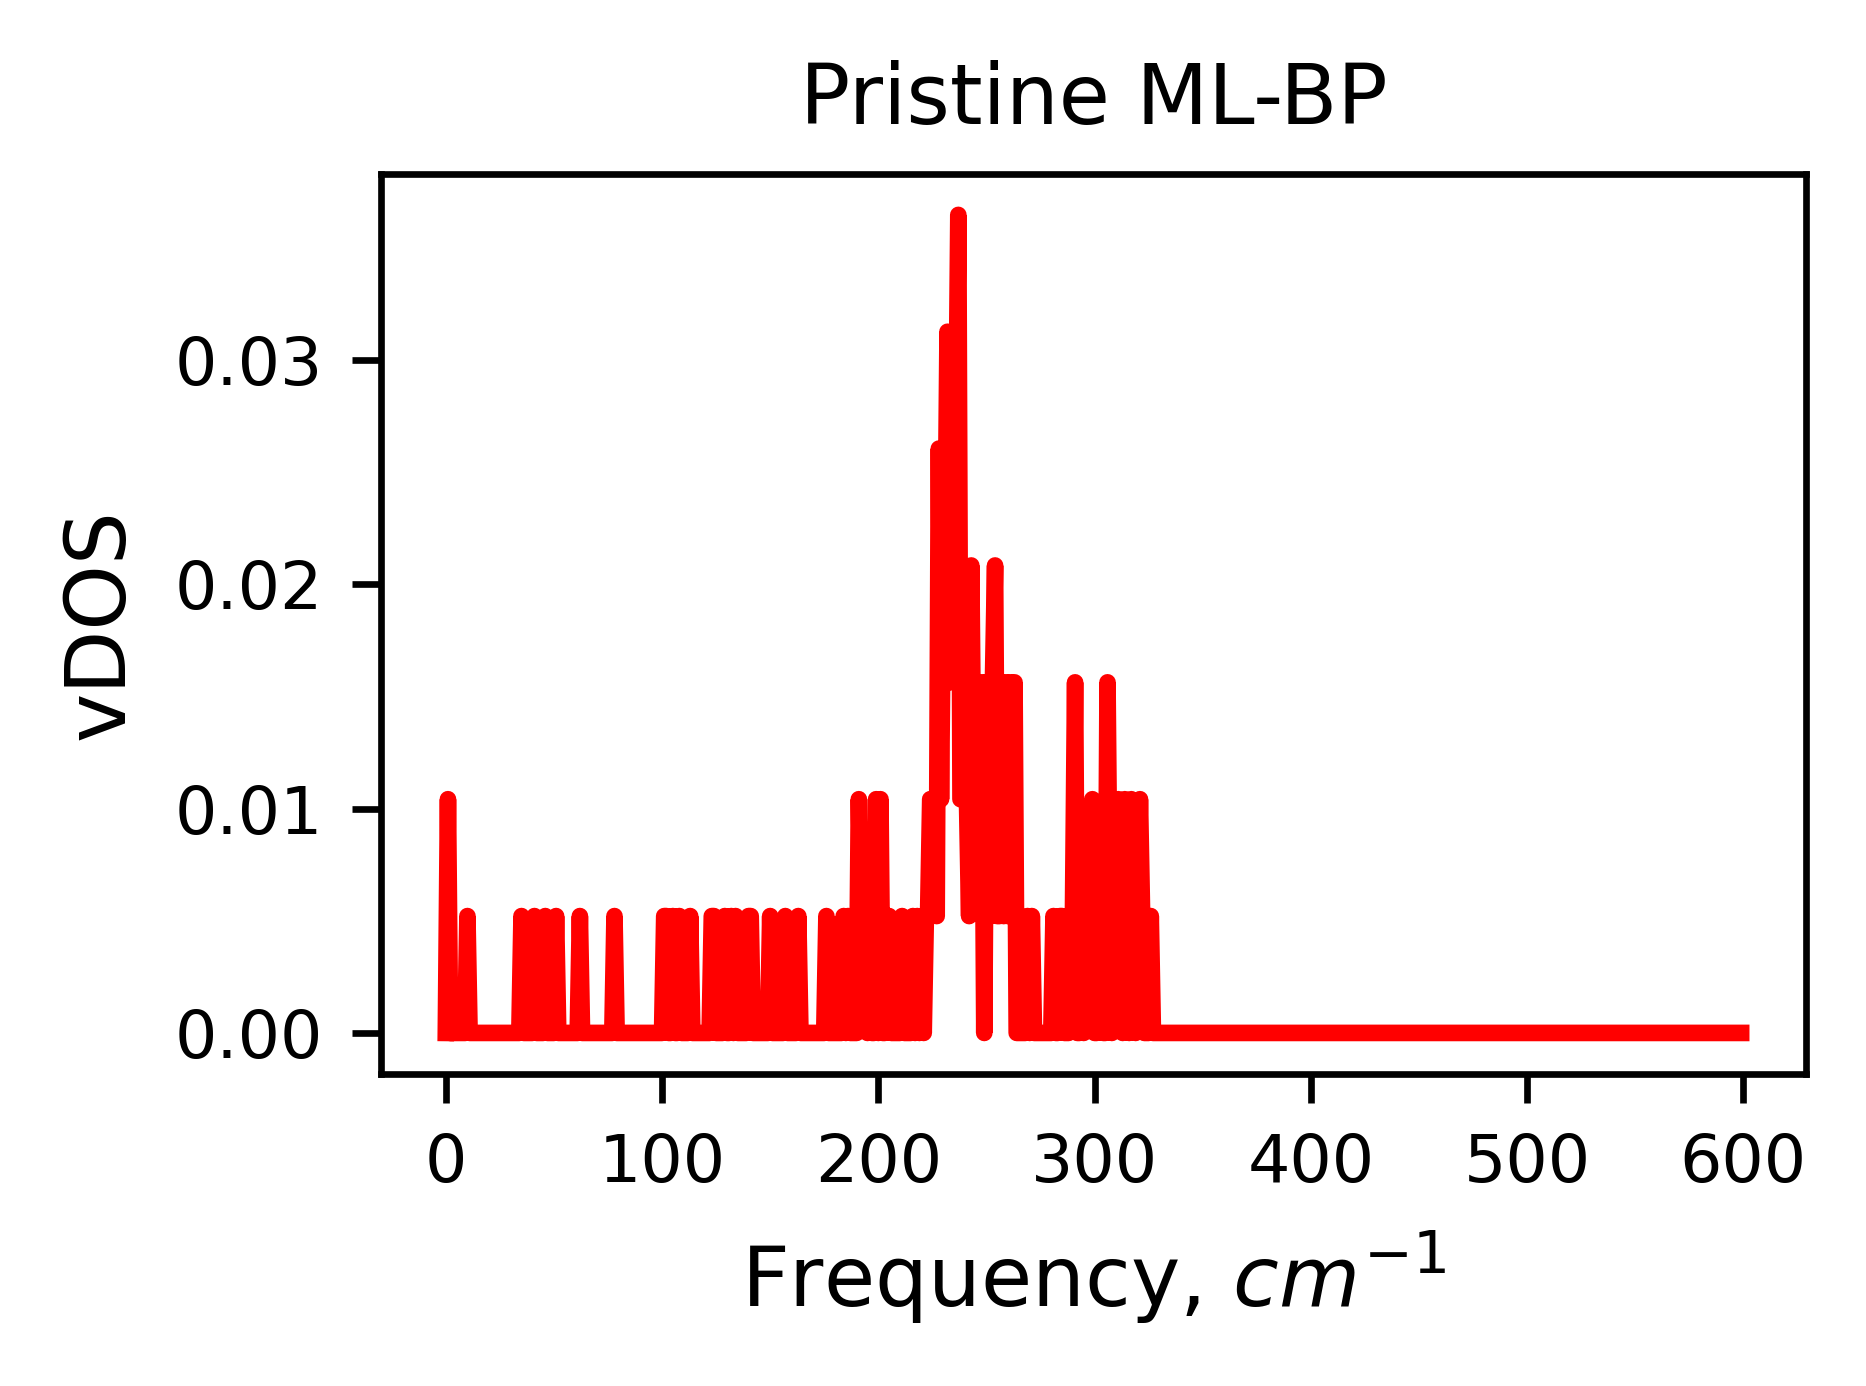

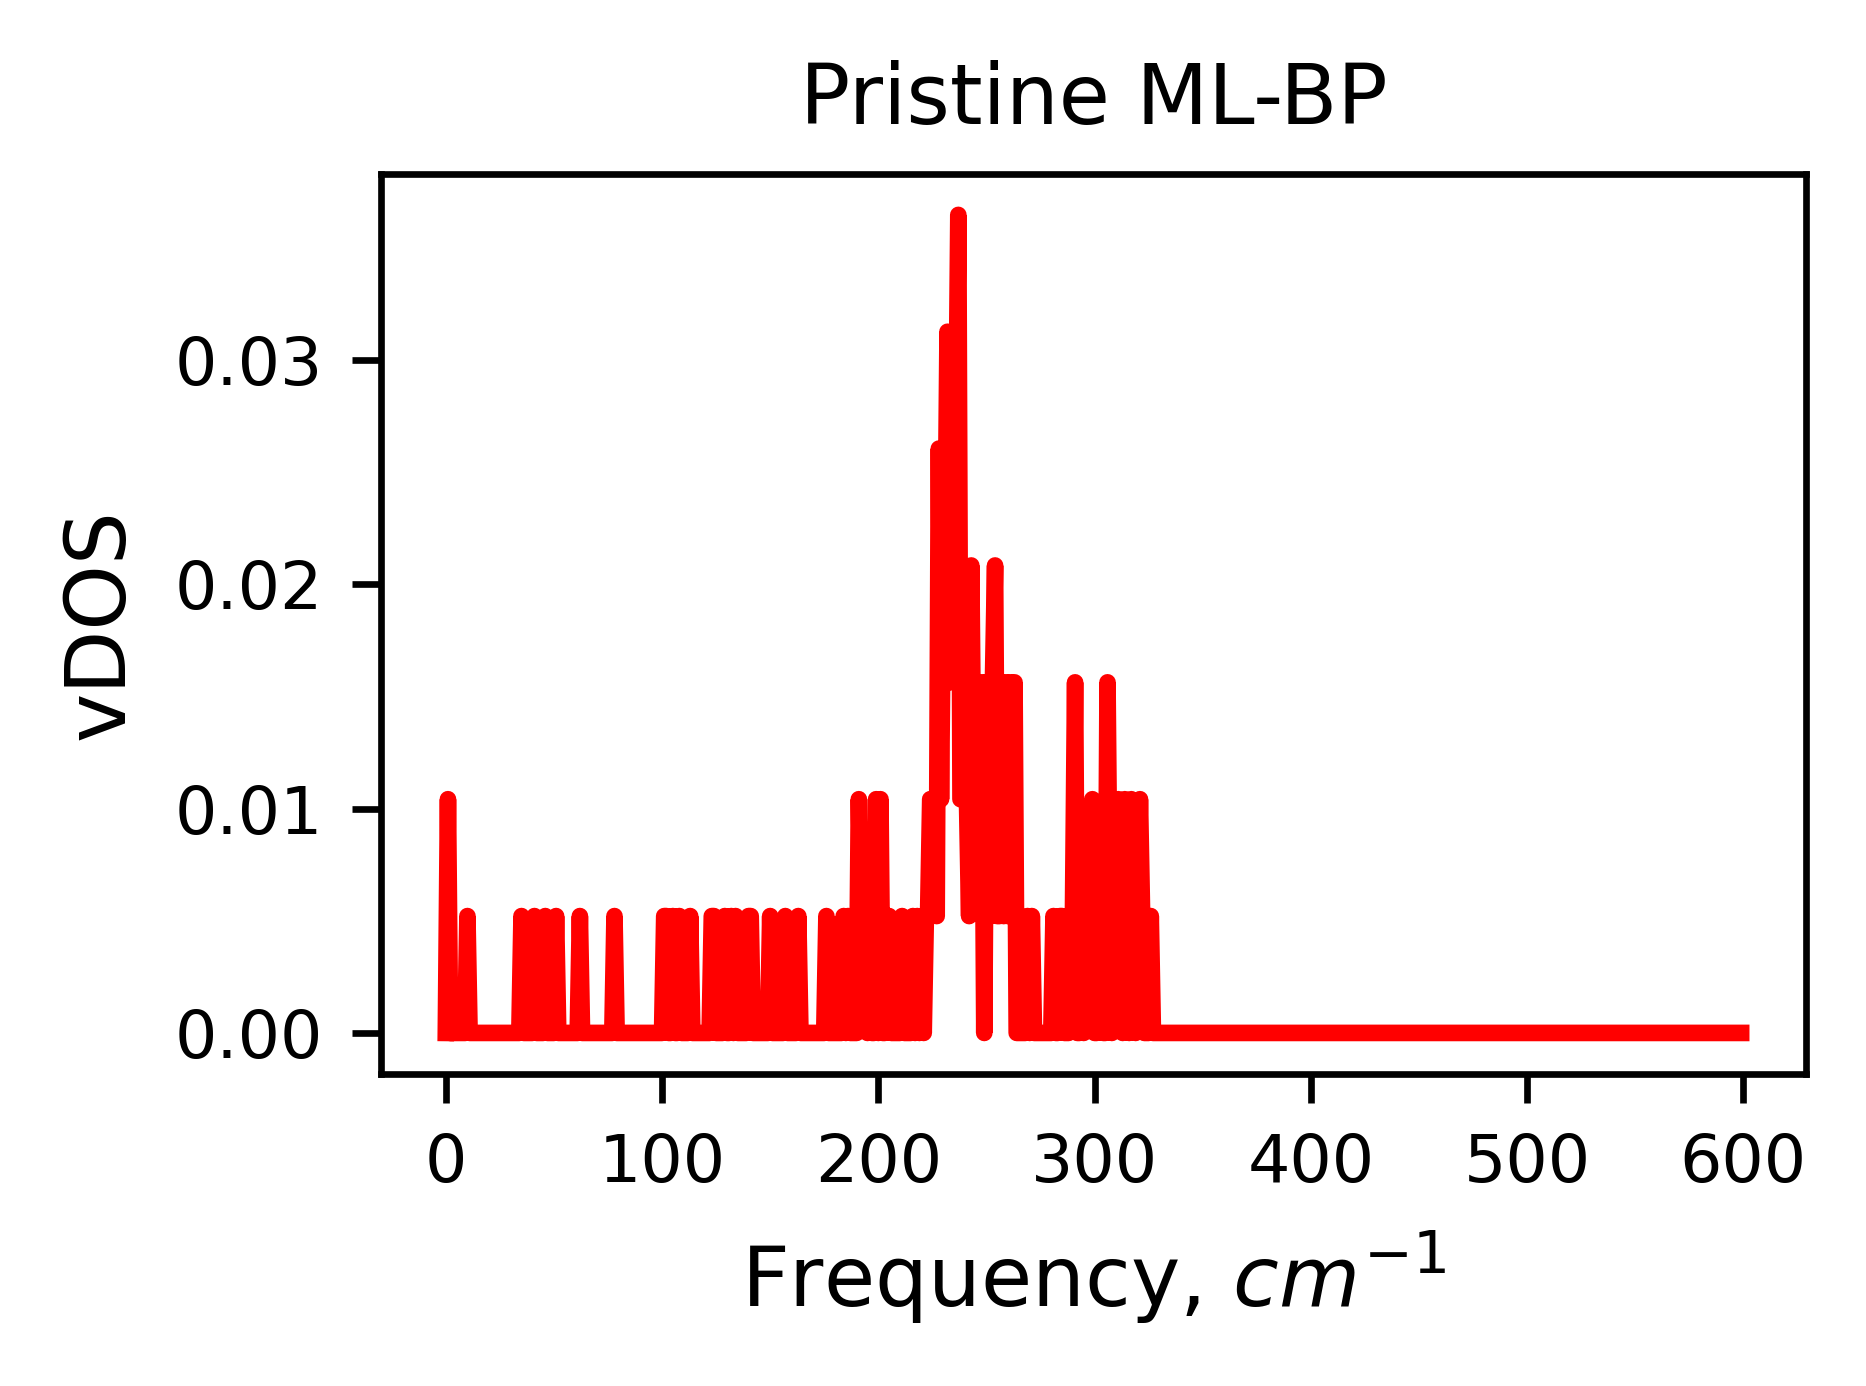

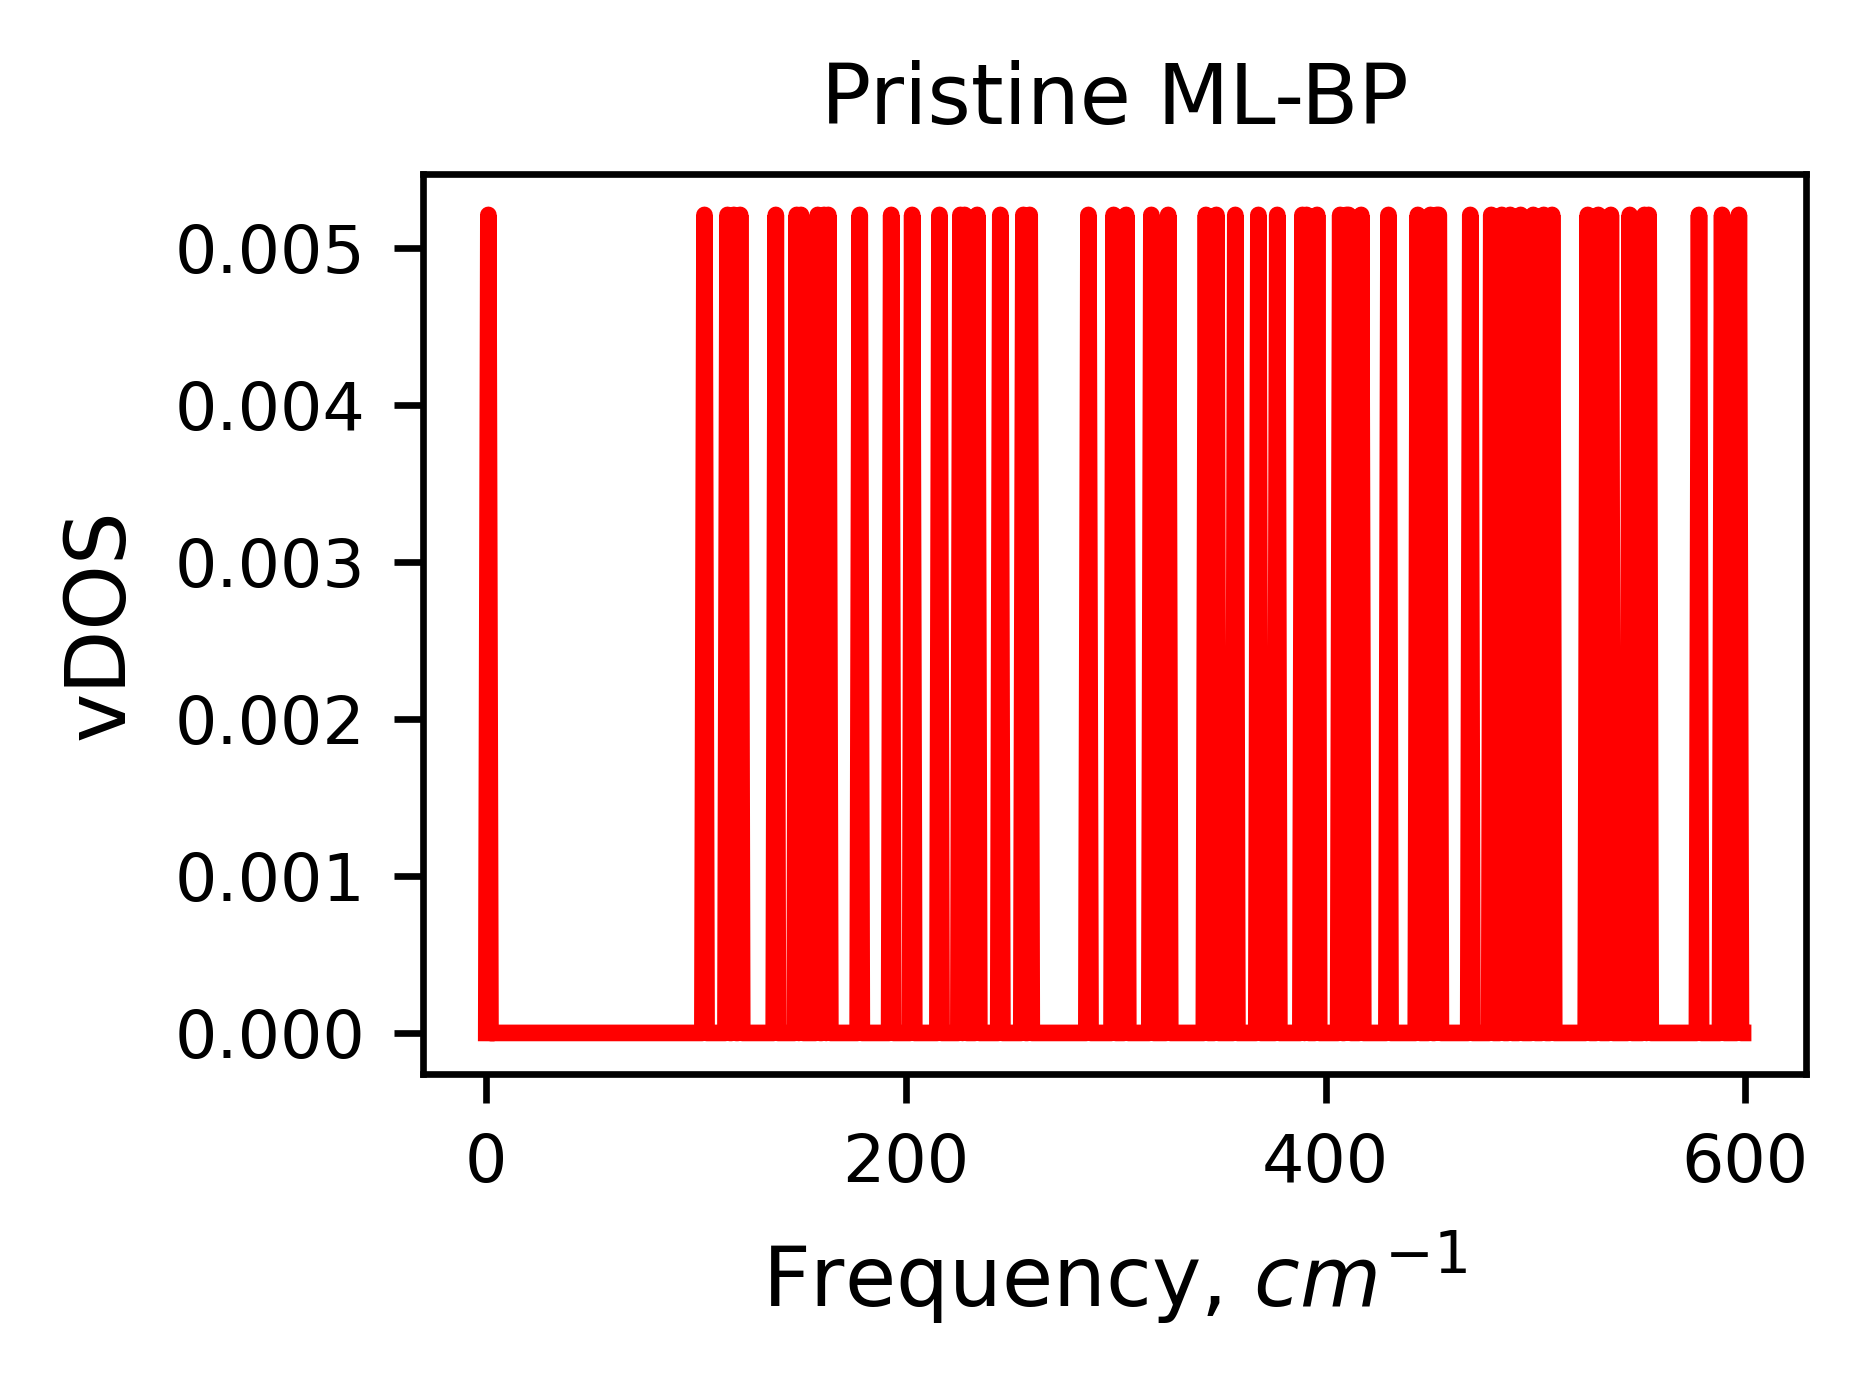

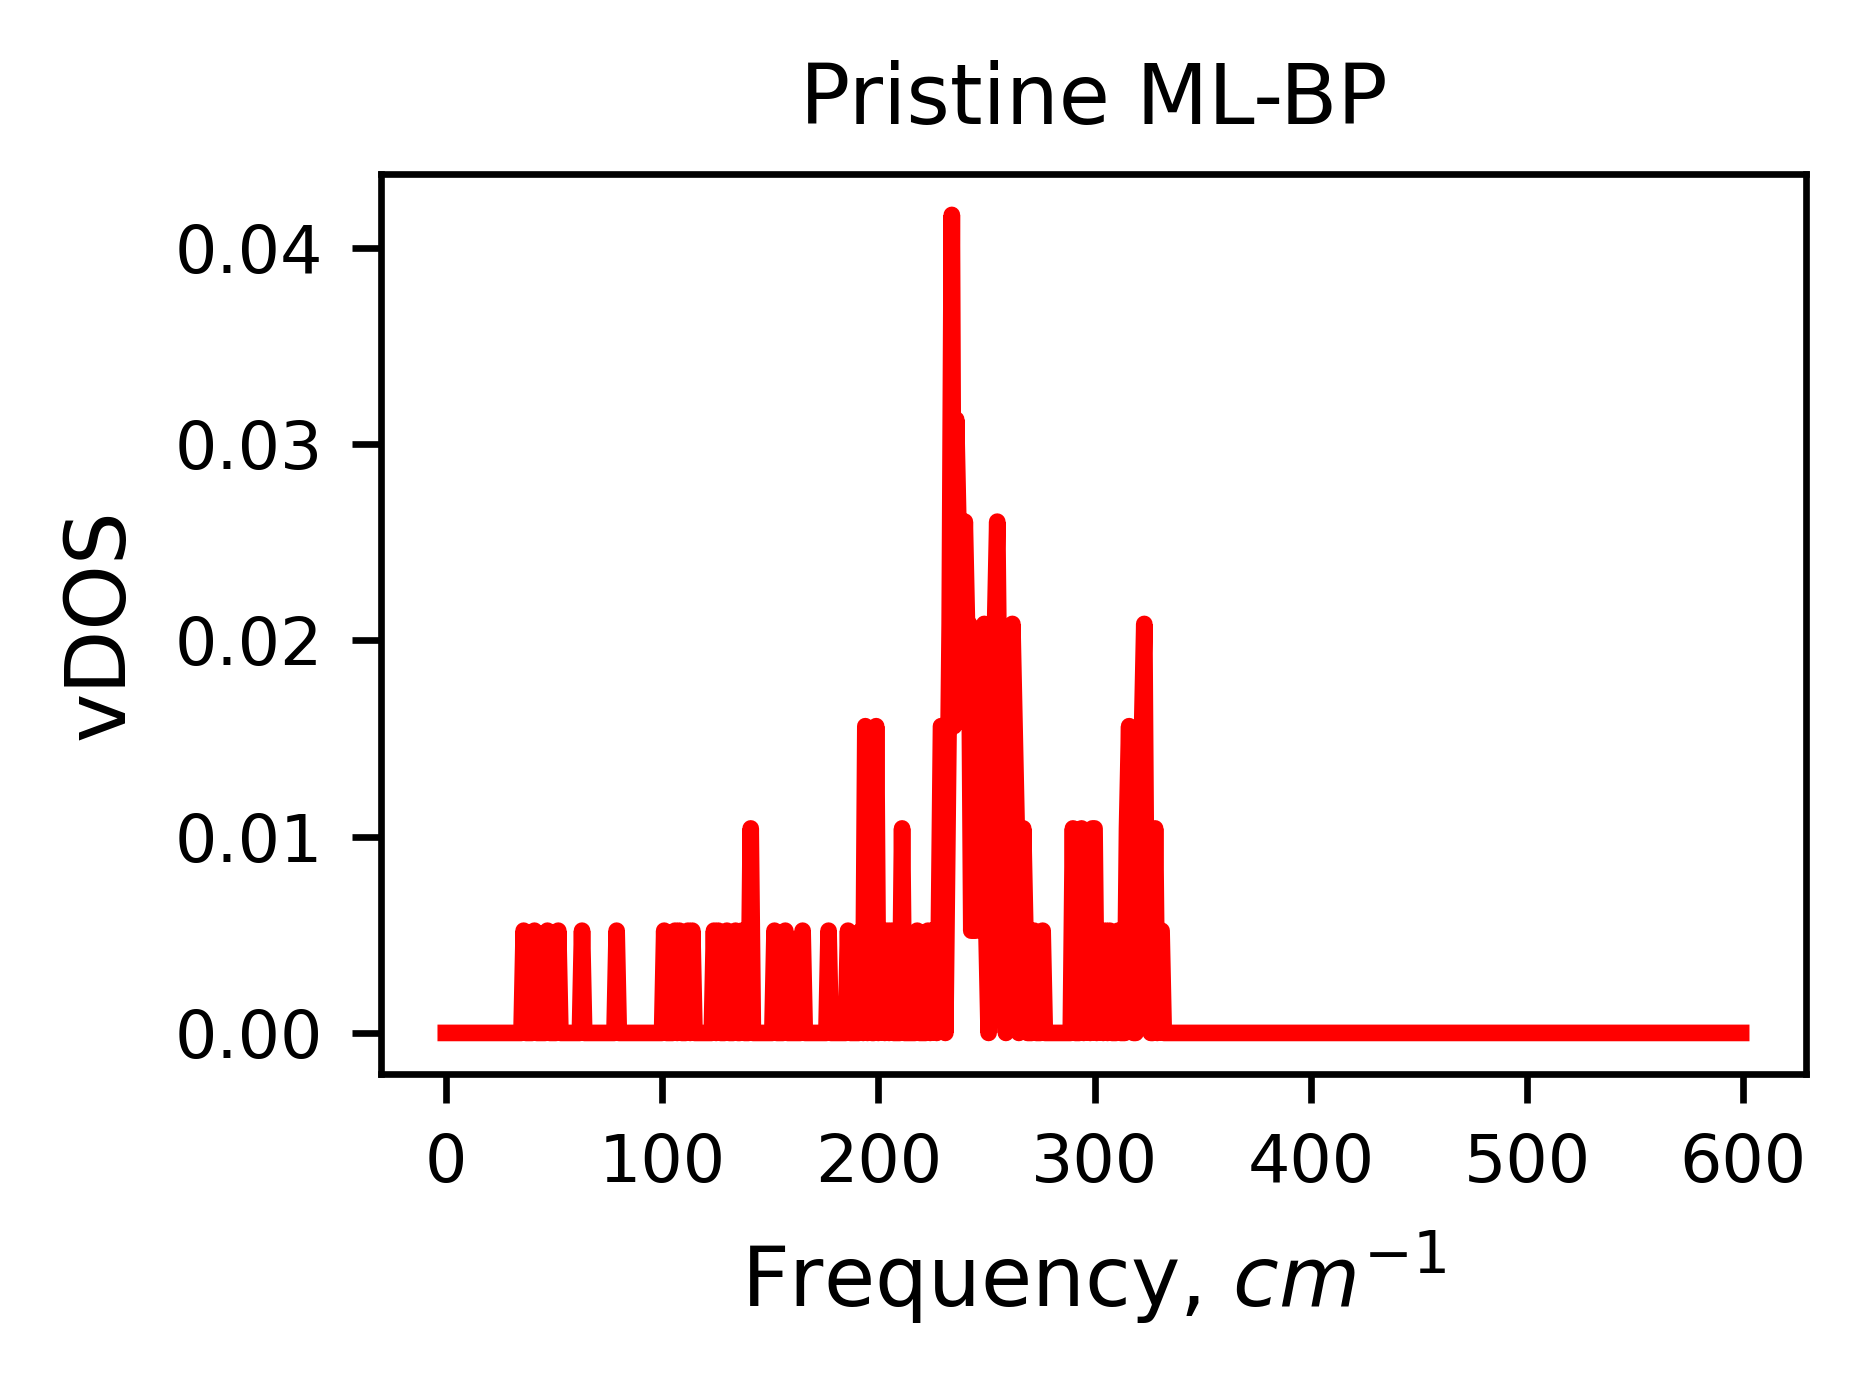

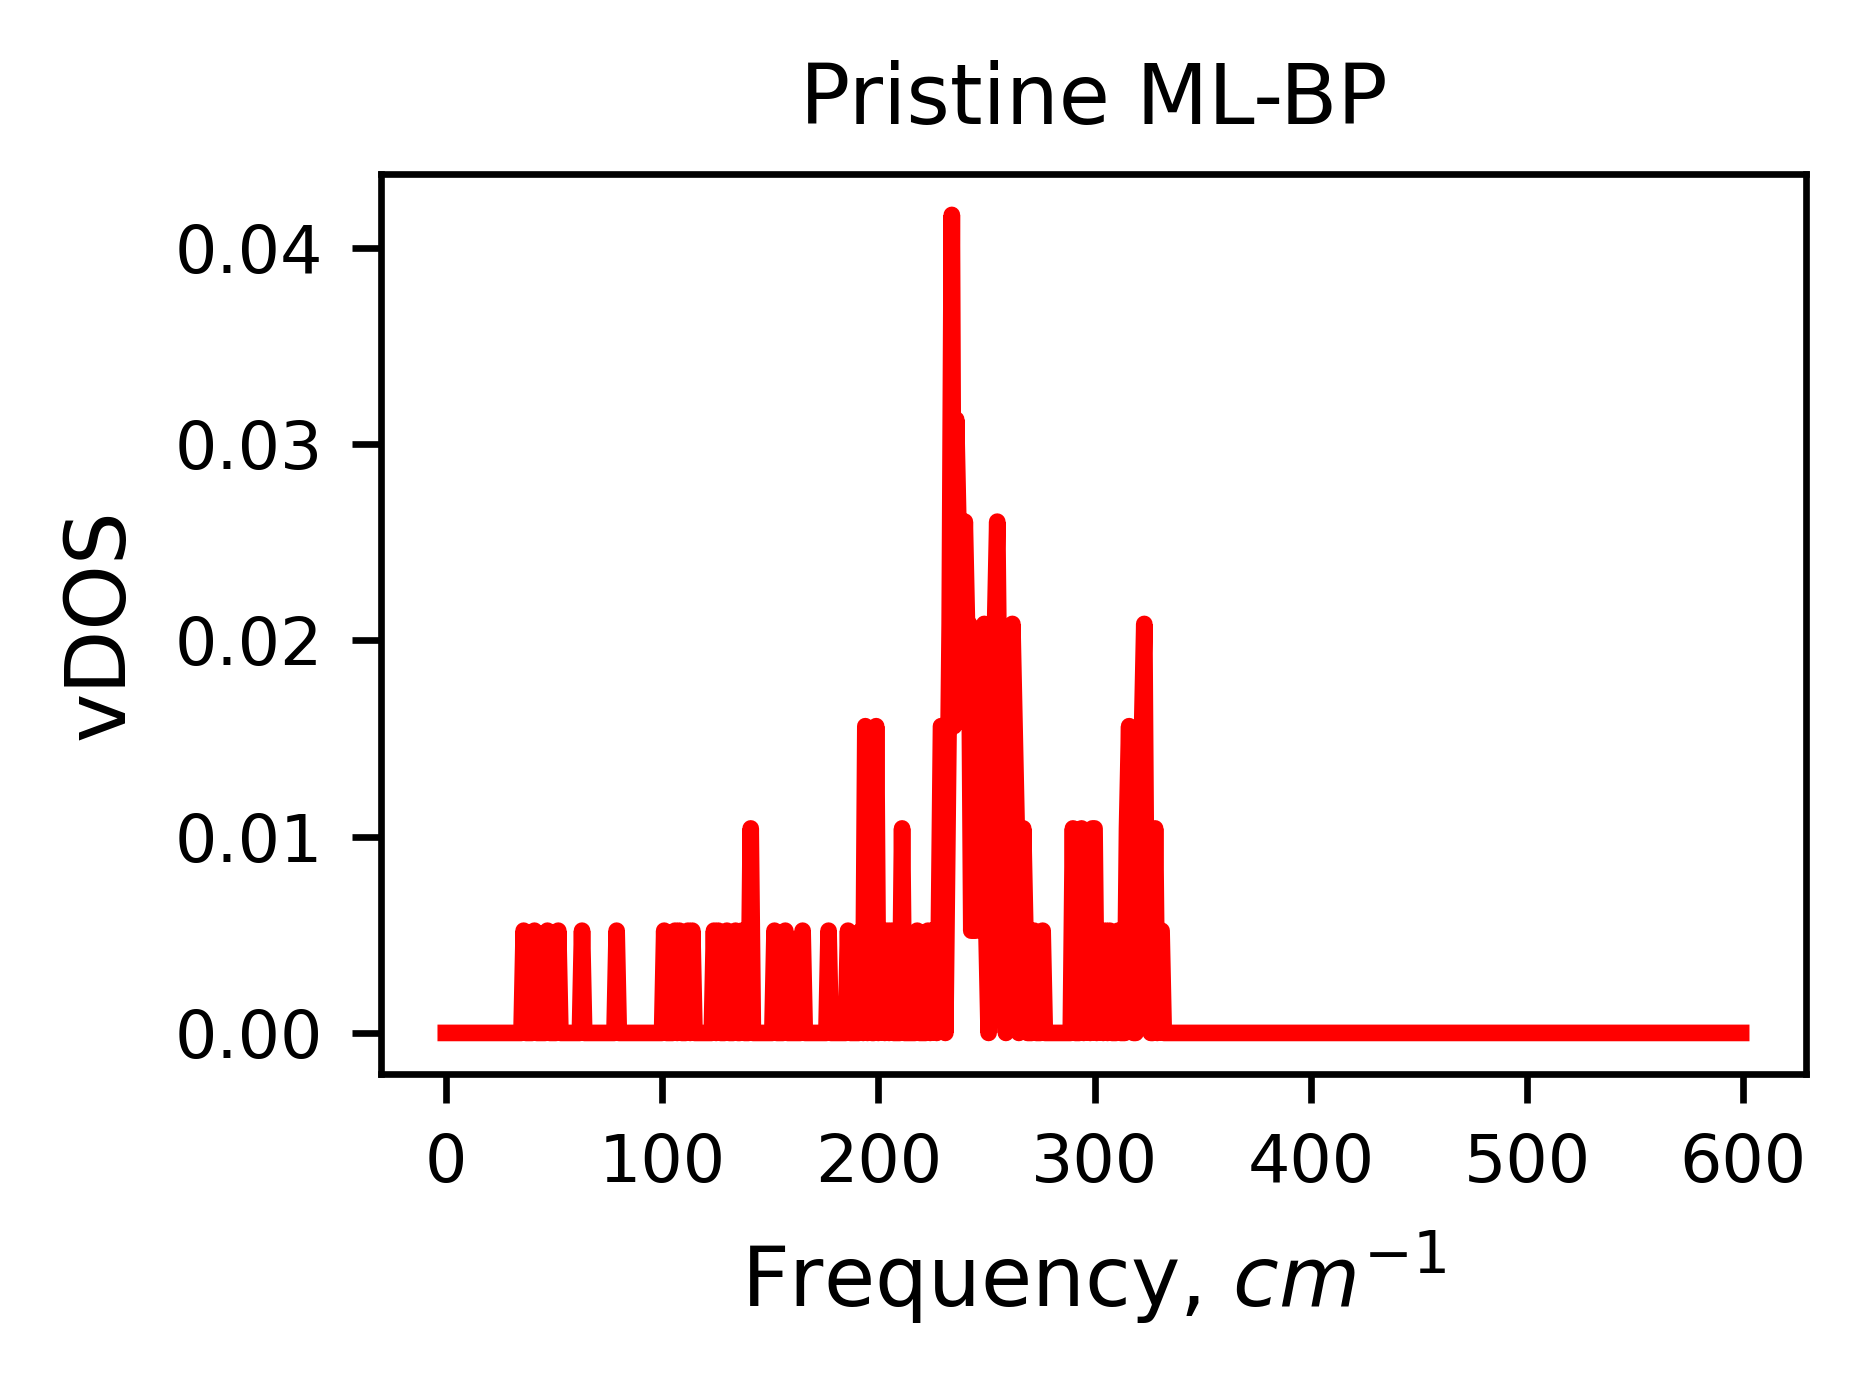

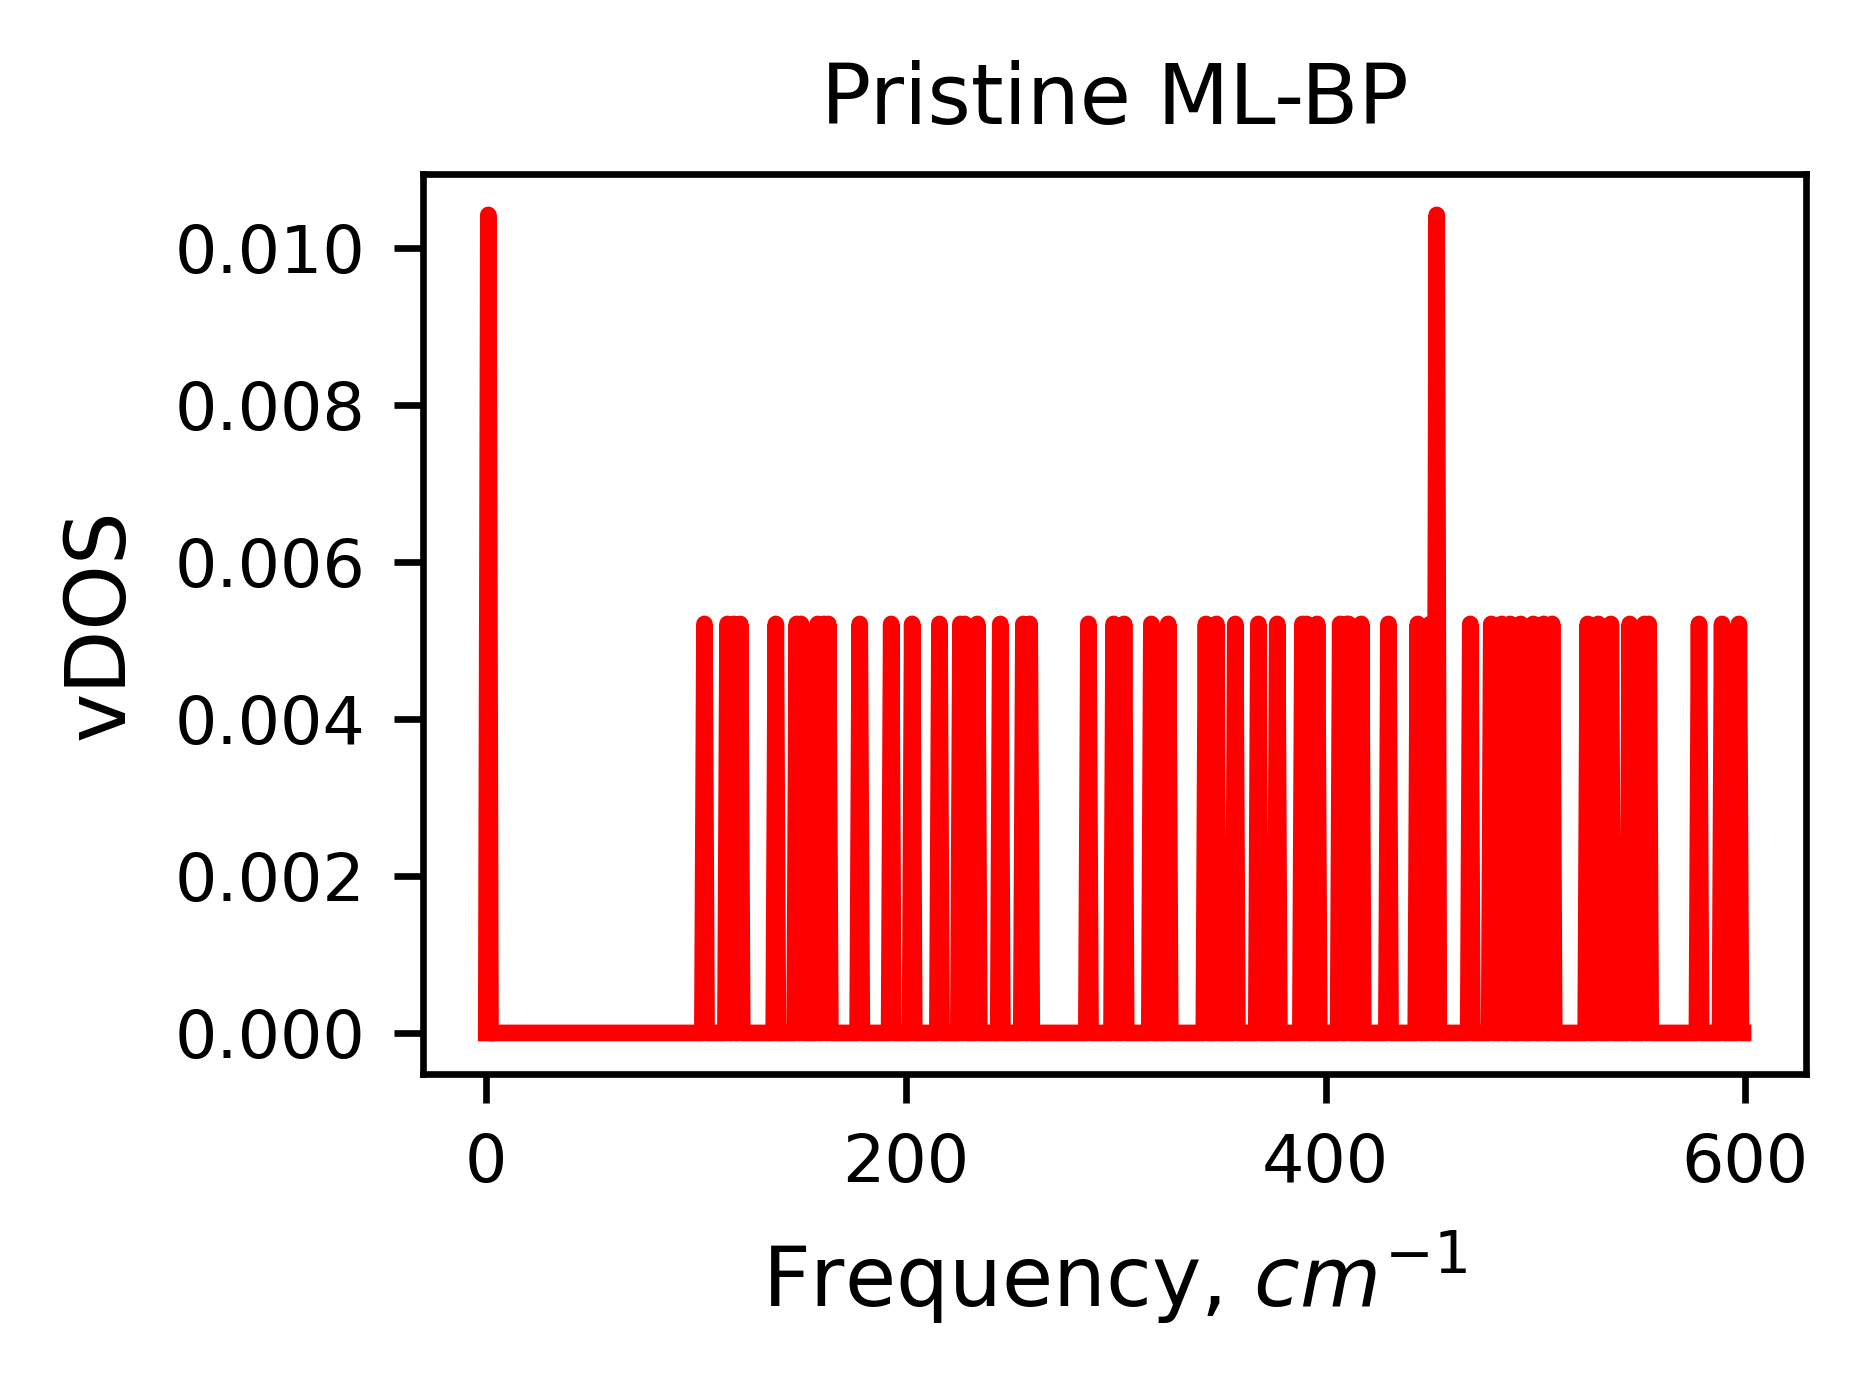

In [14]:

plt.rc('axes', titlesize=12)      # fontsize of the axes title\n",
plt.rc('axes', labelsize=12)      # fontsize of the x and y labels\n",
plt.rc('legend', fontsize=10)     # legend fontsize\n",
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels\n",
plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

for indx, dens in enumerate( [dens00, dens01, dens02,  dens10, dens11, dens12] ):

    figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
    plt.subplot(1,1,1)
    plt.title('Pristine ML-BP', fontsize=10)
    plt.xlabel('Frequency, $cm^{-1}$', fontsize=10)
    plt.ylabel('vDOS', fontsize=10)
    #plt.legend()
    plt.plot(w, dens, label='', linewidth=2, color = "red") 
    plt.tight_layout()
    plt.savefig(F'vDOS-version{indx}.png', dpi=600)
    plt.show()
    plt.close()